In [73]:
using Plots

function lagrange(xs, ys, x)
    result = 0
    for i = xs
        t = ys[i]
        for j = xs
            if i != j
                t *= (x - xs[j]) / (xs[i] - xs[j])
            end
        end
        result += t
    end
    return result
end     

lagrange (generic function with 1 method)

  0.105053 seconds (185.34 k allocations: 8.641 MiB)


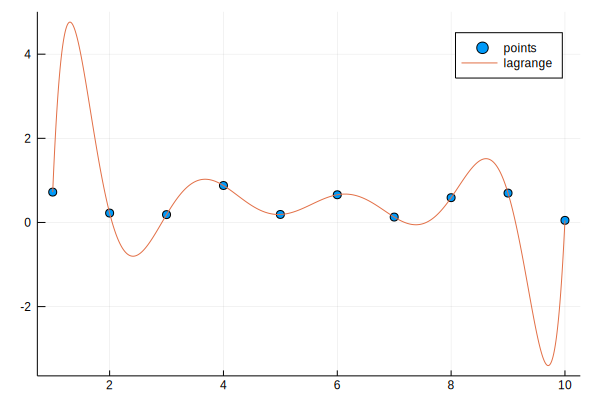

In [74]:
xs = 1:10
ys = [rand() for x in xs]

l_xs = 1:0.01:10
@time l_ys = [lagrange(xs, ys, x) for x in l_xs]

scatter(xs, ys, label="points")
plot!(l_xs, l_ys, label="lagrange")

In [75]:
using Memoize

@memoize function div_diff(ys, xa, xb)
    if xa == xb
        return ys[xa]
    end
    
    return (div_diff(ys, xa + 1, xb) - div_diff(ys, xa, xb - 1)) / (xb - xa)
end

function newton(xs, ys, x)
    result = 0
    for i = 1:size(xs, 1)
        a = div_diff(ys, 1, i)
        t = 1
        if i == 1
            result += a
        else
            for j = 1:(i - 1)
                t *= x - xs[j]
            end
            result += a * t
        end
    end
    return result
end

newton (generic function with 1 method)

  0.139214 seconds (248.27 k allocations: 11.426 MiB)


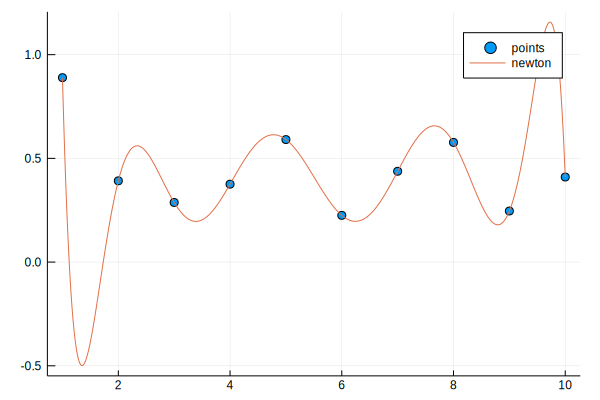

In [76]:
xs = 1:10
ys = [rand() for x in xs]

n_xs = 1:0.01:10
@time n_ys = [newton(xs, ys, x) for x in n_xs]

scatter(xs, ys, label="points")
plot!(n_xs, n_ys, label="newton")